In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading Data

In [ ]:
data = pd.read_csv('/content/manufacturing_Task_01.csv')

data.head()

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,multideminsionality
0,1,97.419169,141.631090,C,IV,103.937207,976.538993,98.309438,1.344160e+06,1.344160e+09,yes,critical,95.609719,689.446383,49.290661,100.287207,yes
1,2,58.706037,128.097654,A,II,101.177877,1031.806826,102.748068,4.424862e+05,4.424862e+08,no,None,98.134313,671.337147,53.086337,57.604083,no
2,3,77.262568,127.105442,A,III,99.381956,840.246668,99.451354,7.597663e+05,7.597663e+08,no,None,99.066902,680.339019,49.570144,76.642305,no
3,4,82.657252,126.011542,A,I,101.833664,964.391123,101.022948,8.619484e+05,8.619484e+08,no,None,96.910245,680.415056,50.396975,83.088178,no
4,5,78.085366,137.092426,C,I,95.246304,859.331870,97.698503,8.359077e+05,8.359077e+08,yes,severe,94.326486,713.309869,51.723823,76.419407,no


In [ ]:
sum(data.error == 'yes')

6185

In [ ]:
# missing values
missing_values = data.isnull()

missing_count = missing_values.sum()

print("Missing values in each column:")
print(missing_count)

Missing values in each column:
id                     0
width                  0
height                 0
ionizationclass        0
FluxCompensation       0
pressure               0
karma                  0
modulation             0
weight_in_kg           0
weight_in_g            0
error                  0
error_type             0
Quality                0
reflectionScore        0
distortion             0
nicesness              0
multideminsionality    0
dtype: int64


In [ ]:
# remove id, weight in gm columns
data = data.drop('id', axis=1)
data = data.drop('weight_in_g', axis=1)
data.head()

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,multideminsionality
0,97.419169,141.631090,C,IV,103.937207,976.538993,98.309438,1.344160e+06,yes,critical,95.609719,689.446383,49.290661,100.287207,yes
1,58.706037,128.097654,A,II,101.177877,1031.806826,102.748068,4.424862e+05,no,None,98.134313,671.337147,53.086337,57.604083,no
2,77.262568,127.105442,A,III,99.381956,840.246668,99.451354,7.597663e+05,no,None,99.066902,680.339019,49.570144,76.642305,no
3,82.657252,126.011542,A,I,101.833664,964.391123,101.022948,8.619484e+05,no,None,96.910245,680.415056,50.396975,83.088178,no
4,78.085366,137.092426,C,I,95.246304,859.331870,97.698503,8.359077e+05,yes,severe,94.326486,713.309869,51.723823,76.419407,no


# Exploratory Data Analysis 

In [ ]:
data.describe()

,width,height,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,nicesness
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2.000007e+07,130.008181,99.983656,998.816837,100.015683,2.653000e+19,96.790766,699.636273,50.014706,2.000007e+07
std,4.467885e+08,10.077314,3.013366,98.810735,2.991423,5.943656e+20,1.901610,29.786650,2.015911,4.467885e+08
min,3.000851e+01,95.466433,89.049069,663.972927,88.292365,9.007893e+04,87.277980,593.202694,42.557672,2.548881e+01
25%,5.617805e+01,123.250943,97.909788,932.773088,97.978794,4.071225e+05,95.680122,679.841500,48.638356,5.606481e+01
50%,6.991078e+01,130.039504,100.015208,999.537913,100.040526,6.346056e+05,97.086588,699.538992,50.026023,6.997947e+01
75%,8.331739e+01,136.802163,102.030866,1065.148985,102.036830,9.048264e+05,98.246879,719.605851,51.374864,8.346961e+01
max,1.000000e+10,166.629635,111.628972,1348.612993,110.814048,1.510000e+22,99.967311,803.908894,57.427735,1.000000e+10


Correlaton Matrix

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,width,height,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,nicesness
width,1.000000,0.011832,-0.008633,-0.002192,0.001456,0.997139,-0.014388,-0.012546,-0.015585,1.000000
height,0.011832,1.000000,-0.013022,-0.006167,-0.009335,0.015169,-0.004044,0.013754,-0.003181,0.011832
pressure,-0.008633,-0.013022,1.000000,-0.002894,0.004466,-0.007377,0.018031,-0.000426,-0.018306,-0.008633
karma,-0.002192,-0.006167,-0.002894,1.000000,0.000588,-0.001556,0.006740,-0.011770,0.021960,-0.002192
modulation,0.001456,-0.009335,0.004466,0.000588,1.000000,0.002326,-0.014591,0.003640,-0.000289,0.001456
weight_in_kg,0.997139,0.015169,-0.007377,-0.001556,0.002326,1.000000,-0.014794,-0.012942,-0.015050,0.997139
Quality,-0.014388,-0.004044,0.018031,0.006740,-0.014591,-0.014794,1.000000,-0.016180,0.005806,-0.014388
reflectionScore,-0.012546,0.013754,-0.000426,-0.011770,0.003640,-0.012942,-0.016180,1.000000,0.000983,-0.012546
distortion,-0.015585,-0.003181,-0.018306,0.021960,-0.000289,-0.015050,0.005806,0.000983,1.000000,-0.015585
nicesness,1.000000,0.011832,-0.008633,-0.002192,0.001456,0.997139,-0.014388,-0.012546,-0.015585,1.000000


<ipython-input-8-6a2b133bacaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


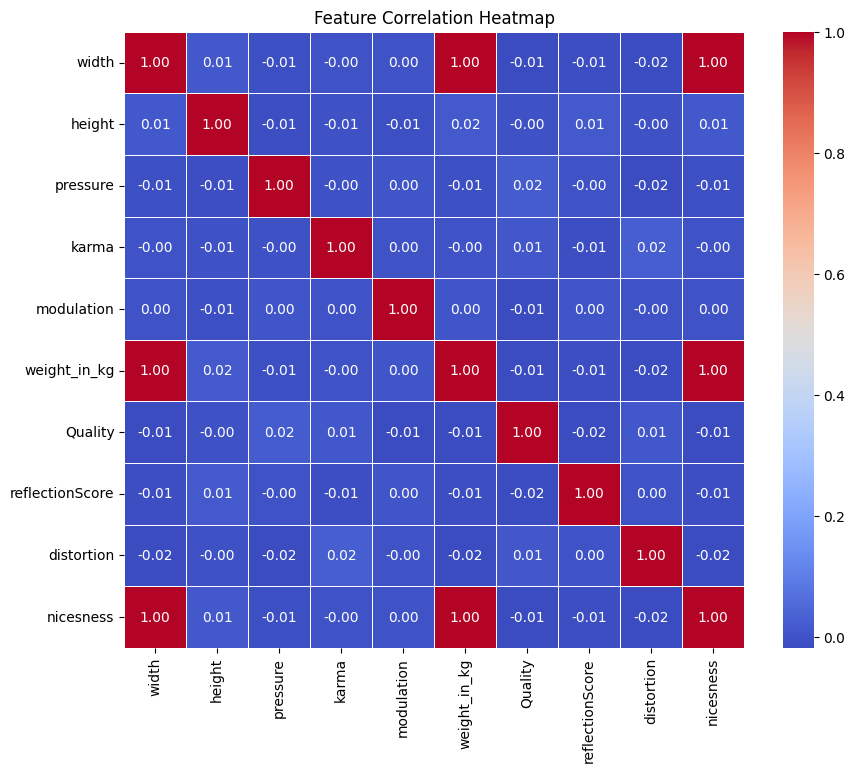

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Histogram of weight distribution

(array([9.98e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 3.00e+00, 7.00e+00,
        5.00e+00, 2.00e+00]),
 array([9.00789279e+04, 7.55000000e+20, 1.51000000e+21, 2.26500000e+21,
        3.02000000e+21, 3.77500000e+21, 4.53000000e+21, 5.28500000e+21,
        6.04000000e+21, 6.79500000e+21, 7.55000000e+21, 8.30500000e+21,
        9.06000000e+21, 9.81500000e+21, 1.05700000e+22, 1.13250000e+22,
        1.20800000e+22, 1.28350000e+22, 1.35900000e+22, 1.43450000e+22,
        1.51000000e+22]),
 <BarContainer object of 20 artists>)

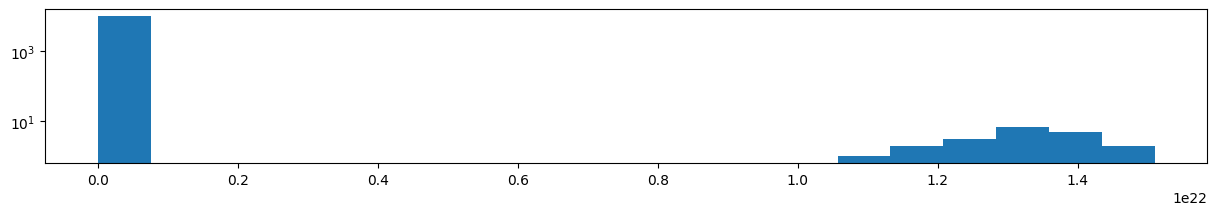

In [ ]:
plt.figure(figsize=(15,2))
plt.hist(data.weight_in_kg,bins=20,log=True)


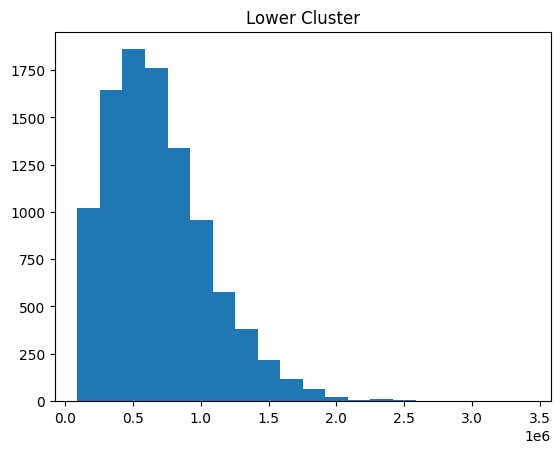

N=9980
Var=139017944435.19522


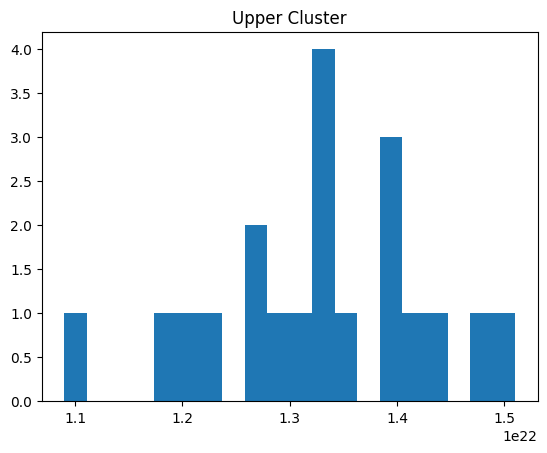

N=20
Var=1.0092750000000007e+42


In [ ]:
lower_cluster = data.loc[data['weight_in_kg'] < 10**7, 'weight_in_kg']
upper_cluster = data.loc[data['weight_in_kg'] > 10**7, 'weight_in_kg']

plt.hist(lower_cluster,bins=20)
plt.title("Lower Cluster")
plt.show()
print(f"N={len(lower_cluster)}")
print(f"Var={np.var(lower_cluster)}")
plt.title("Upper Cluster")
plt.hist(upper_cluster,bins=20)
plt.show()
print(f"N={len(upper_cluster)}")
print(f"Var={np.var(upper_cluster)}")



I think we should get rid of those 20 outliers.

In [ ]:
data = data[data['weight_in_kg'] < 10**22]
data.index = np.arange(0,data.shape[0])
data.shape

(9980, 15)

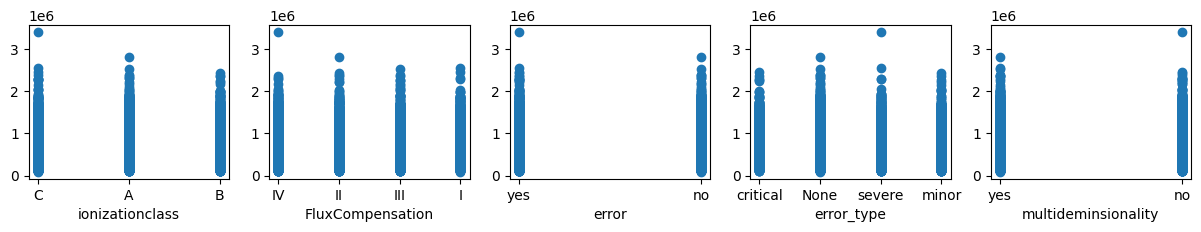

In [ ]:
plt.figure(figsize=(15,2))

for i,category in enumerate(['ionizationclass','FluxCompensation','error','error_type','multideminsionality']):
  plt.subplot(1,5,i+1)
  plt.scatter(data[category], data.weight_in_kg)
  plt.xlabel(category)
plt.show()

# Data Pre-Processing



In [ ]:
# finding unique values
print(data['ionizationclass'].unique())
print(data['FluxCompensation'].unique())
print(data['error'].unique())
print(data['error_type'].unique())
print(data['multideminsionality'].unique())

['C' 'A' 'B']
['IV' 'II' 'III' 'I']
['yes' 'no']
['critical' 'None' 'severe' 'minor']
['yes' 'no']


In [ ]:
# Encoding categorical variables using OneHotEncoder
encoder_1 = OneHotEncoder(sparse=False, drop='first')
encoded_1 = encoder_1.fit_transform(data[['ionizationclass']])
hot_df1 = pd.DataFrame(encoded_1, columns=encoder_1.get_feature_names_out(['ionizationclass']))

encoder_4 = OneHotEncoder(sparse=False, drop='first')
encoded_4 = encoder_4.fit_transform(data[['FluxCompensation']])
hot_df2 = pd.DataFrame(encoded_4, columns=encoder_4.get_feature_names_out(['FluxCompensation']))

encoder_5 = OneHotEncoder(sparse=False, drop='first')
encoded_5 = encoder_5.fit_transform(data[['error_type']])
hot_df3 = pd.DataFrame(encoded_5, columns=encoder_5.get_feature_names_out(['error_type']))

# Concatenating the encoded DataFrames with the original DataFrame
data = pd.concat([data, hot_df1, hot_df2, hot_df3], axis=1)

# Dropping the original categorical columns
data = data.drop(['ionizationclass', 'FluxCompensation', 'error_type'], axis=1)

# Displaying the first few rows of the DataFrame
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,width,height,pressure,karma,modulation,weight_in_kg,error,Quality,reflectionScore,distortion,nicesness,multideminsionality,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV,error_type_critical,error_type_minor,error_type_severe
0,97.419169,141.631090,103.937207,976.538993,98.309438,1.344160e+06,yes,95.609719,689.446383,49.290661,100.287207,yes,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,58.706037,128.097654,101.177877,1031.806826,102.748068,4.424862e+05,no,98.134313,671.337147,53.086337,57.604083,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,77.262568,127.105442,99.381956,840.246668,99.451354,7.597663e+05,no,99.066902,680.339019,49.570144,76.642305,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,82.657252,126.011542,101.833664,964.391123,101.022948,8.619484e+05,no,96.910245,680.415056,50.396975,83.088178,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.085366,137.092426,95.246304,859.331870,97.698503,8.359077e+05,yes,94.326486,713.309869,51.723823,76.419407,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Encoding ordinal variables using LabelEncoder
encoder_2 = LabelEncoder()
data['error'] = encoder_2.fit_transform(data['error'])

encoder_3 = LabelEncoder()
data['multideminsionality'] = encoder_3.fit_transform(data['multideminsionality'])

data.head()

,width,height,pressure,karma,modulation,weight_in_kg,error,Quality,reflectionScore,distortion,nicesness,multideminsionality,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV,error_type_critical,error_type_minor,error_type_severe
0,97.419169,141.631090,103.937207,976.538993,98.309438,1.344160e+06,1,95.609719,689.446383,49.290661,100.287207,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,58.706037,128.097654,101.177877,1031.806826,102.748068,4.424862e+05,0,98.134313,671.337147,53.086337,57.604083,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,77.262568,127.105442,99.381956,840.246668,99.451354,7.597663e+05,0,99.066902,680.339019,49.570144,76.642305,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,82.657252,126.011542,101.833664,964.391123,101.022948,8.619484e+05,0,96.910245,680.415056,50.396975,83.088178,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.085366,137.092426,95.246304,859.331870,97.698503,8.359077e+05,1,94.326486,713.309869,51.723823,76.419407,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.corr()

,width,height,pressure,karma,modulation,weight_in_kg,error,Quality,reflectionScore,distortion,nicesness,multideminsionality,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV,error_type_critical,error_type_minor,error_type_severe
width,1.000000,-0.007152,-0.009571,0.014140,0.006734,0.972294,-0.011602,-0.009289,-0.012492,0.003585,0.994684,-0.019155,-0.008687,-0.005616,0.003011,0.004786,0.004356,-0.008485,-0.011907,0.006572
height,-0.007152,1.000000,-0.013663,-0.006527,-0.009894,0.134532,0.004499,-0.003611,0.014217,-0.003309,-0.006415,-0.005940,0.006124,0.004259,-0.020554,0.009301,-0.001695,0.021820,-0.014347,-0.001751
pressure,-0.009571,-0.013663,1.000000,-0.003586,0.003977,-0.008581,-0.000668,0.017202,-0.001526,-0.016924,-0.006424,-0.002551,-0.006689,0.008068,0.004015,0.000259,-0.005139,0.000792,-0.008168,0.006713
karma,0.014140,-0.006527,-0.003586,1.000000,0.000160,0.013388,-0.006786,0.006374,-0.011856,0.022831,0.013747,-0.013980,0.012422,-0.016211,-0.007543,0.016784,-0.001973,0.005925,-0.017436,0.003630
modulation,0.006734,-0.009894,0.003977,0.000160,1.000000,0.005170,-0.000986,-0.014550,0.003446,0.000679,0.006251,-0.009682,0.009993,-0.013165,0.001298,0.011628,0.005420,0.006802,0.000598,-0.008591
weight_in_kg,0.972294,0.134532,-0.008581,0.013388,0.005170,1.000000,-0.014180,-0.013569,-0.012428,0.006558,0.966978,-0.016464,-0.012055,-0.003932,-0.002439,0.008565,0.006678,-0.009750,-0.014690,0.007553
error,-0.011602,0.004499,-0.000668,-0.006786,-0.000986,-0.014180,1.000000,0.009905,-0.000102,-0.010474,-0.012033,-0.006128,0.415542,0.415332,-0.015913,0.003997,0.009465,0.395741,0.408858,0.396847
Quality,-0.009289,-0.003611,0.017202,0.006374,-0.014550,-0.013569,0.009905,1.000000,-0.016548,0.006416,-0.009275,-0.006739,0.010394,-0.005473,0.012208,0.001984,-0.011565,0.021430,-0.009253,-0.000014
reflectionScore,-0.012492,0.014217,-0.001526,-0.011856,0.003446,-0.012428,-0.000102,-0.016548,1.000000,0.002215,-0.010328,-0.006425,0.005876,-0.008622,-0.020516,0.010389,0.007530,0.000351,-0.006810,0.006457
distortion,0.003585,-0.003309,-0.016924,0.022831,0.000679,0.006558,-0.010474,0.006416,0.002215,1.000000,0.003202,0.016563,0.007004,-0.017618,-0.009740,0.013624,-0.006030,0.012636,-0.015279,-0.009721


# Further Exploratory Ananlysis 


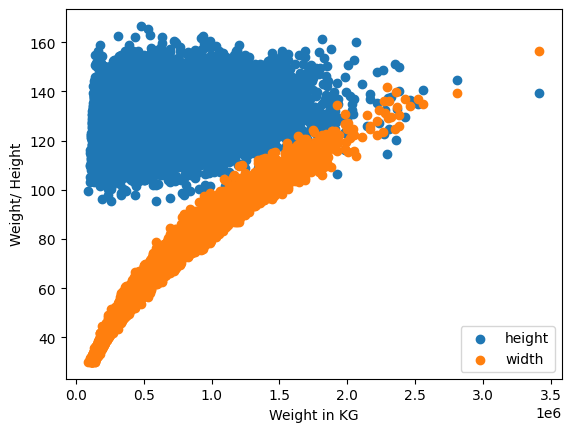

In [ ]:
plt.scatter(data.weight_in_kg, data.height, label="height")
plt.scatter(data.weight_in_kg, data.width, label="width")
plt.xlabel("Weight in KG")
plt.ylabel("Weight/ Height")
plt.legend()
plt.show()

In [ ]:
error_rate_total = sum(data.error) / 9980
print(sum(data.error))
print(f"Error rate: {error_rate_total*100:.4}%")

6167
Error rate: 61.79%


In [ ]:
class_C = data[(data['ionizationclass_C'] == 1)]
class_B = data[(data['ionizationclass_B'] == 1)]
error_rate = (class_C.error.sum()+class_B.error.sum()) / (class_C.shape[0]+class_B.shape[0])
print(f"Error rate among class B or C: {error_rate*100:.4}%")
print(f"N_B_C={(class_C.shape[0]+class_B.shape[0])}")

Error rate among class B or C: 90.4%
N_B_C=6635


In [ ]:
class_A = data[(data['ionizationclass_B'] == 0) & (data['ionizationclass_C'] == 0)]
error_rate = class_A.error.sum() / class_A.shape[0]
print(f"Error rate among class A: {error_rate*100:.4}%")
print(f"N_A={class_A.shape[0]}")

Error rate among class A: 5.052%
N_A=3345


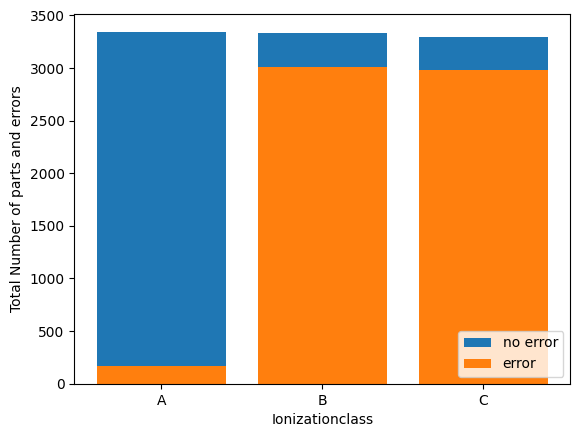

In [ ]:
plt.bar(["A","B","C"], [class_A.shape[0],class_B.shape[0],class_C.shape[0]], label="no error")
plt.bar(["A","B","C"], [class_A.error.sum(), class_B.error.sum(),class_C.error.sum()], label="error")
plt.legend(loc=4)
plt.xlabel("Ionizationclass")
plt.ylabel("Total Number of parts and errors")
plt.show()

# Predict Weight 

In [ ]:
# Splitting features and target

columns_to_drop = ['weight_in_kg', 'error', 'Quality', 'reflectionScore', 'distortion', 'nicesness', 'multideminsionality', 'error_type_critical', 'error_type_minor', 'error_type_severe']
x = data.drop(columns=columns_to_drop, axis=1)
y= data['weight_in_kg']

x

,width,height,pressure,karma,modulation,ionizationclass_B,ionizationclass_C,FluxCompensation_II,FluxCompensation_III,FluxCompensation_IV
0,97.419169,141.631090,103.937207,976.538993,98.309438,0.0,1.0,0.0,0.0,1.0
1,58.706037,128.097654,101.177877,1031.806826,102.748068,0.0,0.0,1.0,0.0,0.0
2,77.262568,127.105442,99.381956,840.246668,99.451354,0.0,0.0,0.0,1.0,0.0
3,82.657252,126.011542,101.833664,964.391123,101.022948,0.0,0.0,0.0,0.0,0.0
4,78.085366,137.092426,95.246304,859.331870,97.698503,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9975,108.955184,130.398787,95.194964,901.439672,104.020763,0.0,1.0,0.0,0.0,1.0
9976,58.693482,136.115631,95.557115,1074.422817,103.228564,1.0,0.0,0.0,0.0,1.0
9977,40.361968,132.070865,105.874139,922.783752,100.698130,0.0,1.0,0.0,0.0,1.0
9978,74.292997,144.372153,98.550208,949.594801,97.181766,0.0,1.0,1.0,0.0,0.0


In [ ]:
y

0       1.344160e+06
1       4.424862e+05
2       7.597663e+05
3       8.619484e+05
4       8.359077e+05
            ...     
9975    1.548007e+06
9976    4.689179e+05
9977    2.151648e+05
9978    7.968641e+05
9979    1.046159e+06
Name: weight_in_kg, Length: 9980, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x.shape, X_train.shape, X_test.shape)

(9980, 10) (6986, 10) (2994, 10)


In [ ]:
# Models

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predictions on training data

train_data_pred_xgb = xgb.predict(X_train)
train_data_pred_rfr = rfr.predict(X_train)
train_data_pred_lr = lr.predict(X_train)

r2_train_xgb= metrics.r2_score(y_train, train_data_pred_xgb)
r2_train_rfr= metrics.r2_score(y_train, train_data_pred_rfr)
r2_train_lr= metrics.r2_score(y_train, train_data_pred_lr)

print('R squared values for XGB: ',r2_train_xgb)
print('R squared values for RFR: ',r2_train_rfr)
print('R squared values for Linear Regression: ',r2_train_lr)

R squared values for XGB:  0.9999158141583716
R squared values for RFR:  0.9997269587993668
R squared values for Linear Regression:  0.9656657150209911


In [ ]:
# predictions on test data

test_data_pred_xgb = xgb.predict(X_test)
test_data_pred_rfr = rfr.predict(X_test)
test_data_pred_lr = lr.predict(X_test)

r2_test_xgb= metrics.r2_score(y_test, test_data_pred_xgb)
r2_test_rfr= metrics.r2_score(y_test, test_data_pred_rfr)
r2_test_lr= metrics.r2_score(y_test, test_data_pred_lr)

print('R squared values for XGB: ',r2_test_xgb)
print('R squared values for RFR: ',r2_test_rfr)
print('R squared values for Linear Regression: ',r2_test_lr)

R squared values for XGB:  0.9973716173166427
R squared values for RFR:  0.9990600375362262
R squared values for Linear Regression:  0.9647404249540434


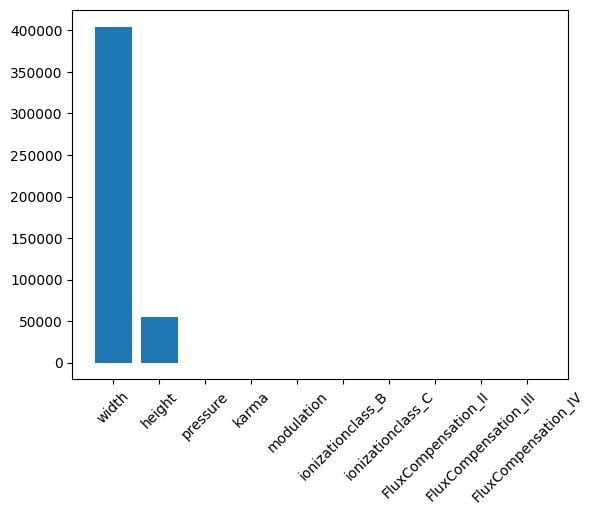

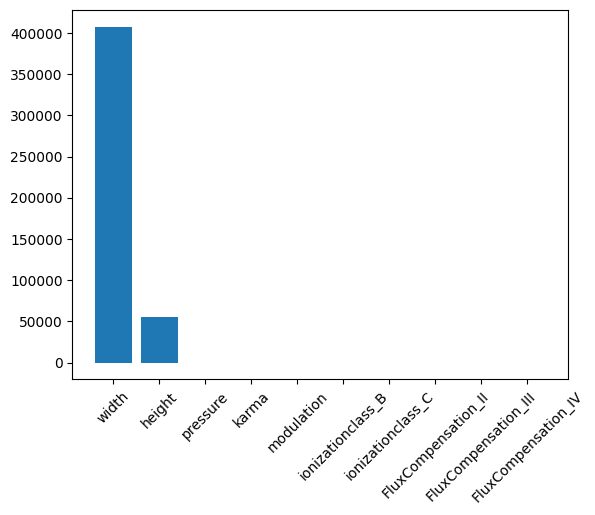

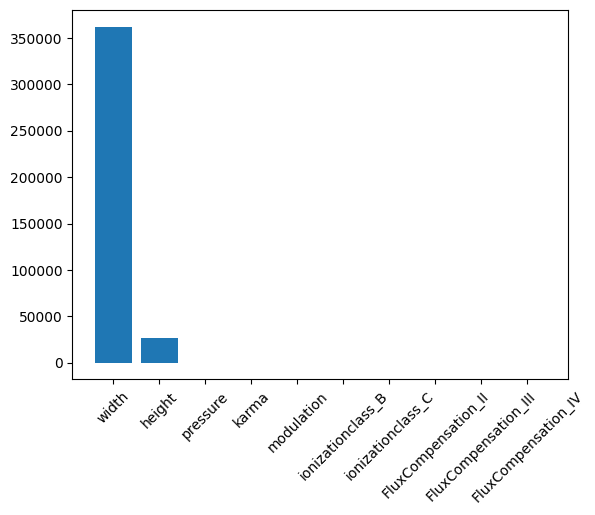

In [ ]:
from sklearn.inspection import permutation_importance
for model in [xgb, rfr,lr]:
  importance = permutation_importance(model, X_test,
  y_test,n_repeats=10,random_state=42,scoring='neg_mean_absolute_error')
  pos = np.arange(len(importance.importances_mean))
  plt.bar(pos,importance.importances_mean,tick_label=X_test.columns)
  plt.xticks(rotation=45)
  plt.show()

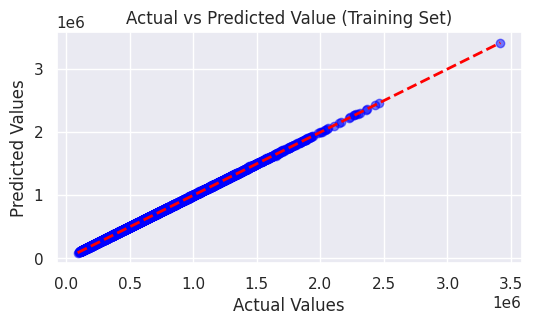

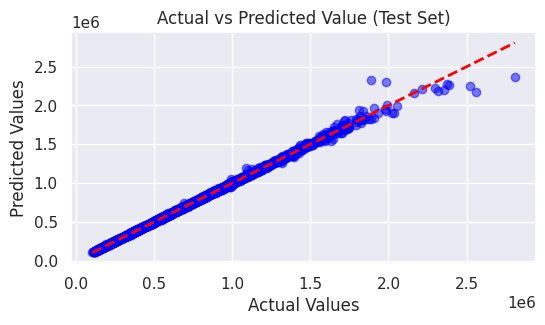

In [ ]:
# visualising errors XGB (train)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_train, train_data_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# visualising errors XGB (test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_test, test_data_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

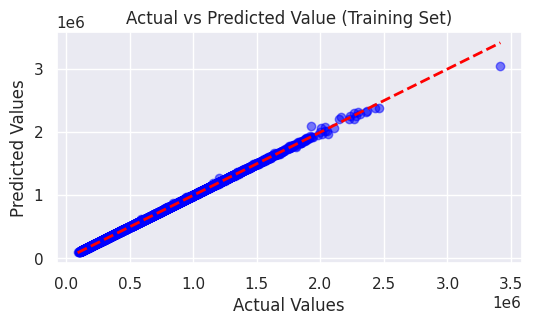

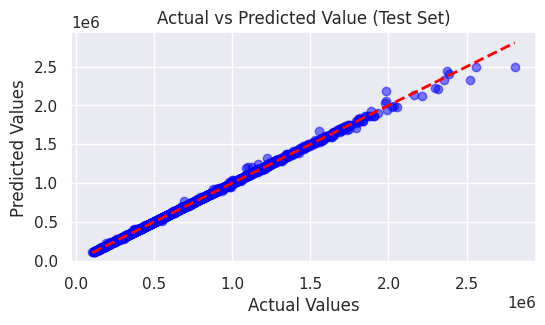

In [ ]:
# visualising errors Random Forest (train)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_train, train_data_pred_rfr, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# visualising errors Random Forest (test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_test, test_data_pred_rfr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

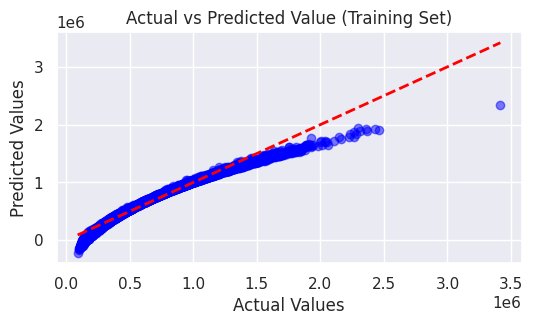

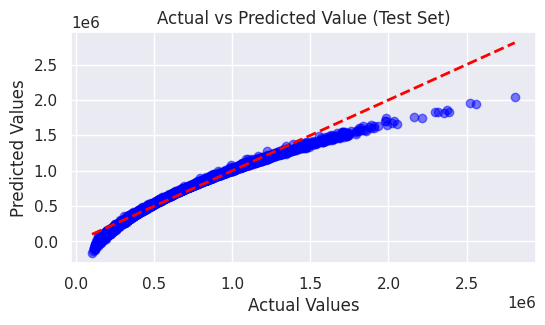

In [ ]:
# visualising errors Linear Regression (train)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_train, train_data_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# visualising errors Linear Regression (test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6,3))
plt.scatter(y_test, test_data_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Value (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Linear regression with only width as a feature

# Predict Error


In [ ]:
from xgboost import XGBClassifier
#from sklearn.preprocessing import StandardScaler

In [ ]:
features_Q2 = data[['width', 'height', 'pressure', 'karma', 'modulation',
       'ionizationclass_B', 'ionizationclass_C',
       'FluxCompensation_II', 'FluxCompensation_III', 'FluxCompensation_IV']]
target_Q2 = data.error

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features_Q2, target_Q2, test_size=0.3, random_state=42)

In [ ]:
xgbC = XGBClassifier()
xgbC.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_test_pred_xgb = xgbC.predict(X_test)
acc=sum(Y_test_pred_xgb==Y_test)/len(Y_test)
print(f"Test accuracy = {round(acc*100,2)} %")

Y_train_pred_xgb = xgbC.predict(X_train)
acc=sum(Y_train_pred_xgb==Y_train)/len(Y_train)
print(f"Train accuracy = {round(acc*100,2)} %")

Test accuracy = 91.88 %
Train accuracy = 96.61 %


In [ ]:
confusion_matrix_xgb = pd.crosstab(Y_test, Y_test_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_xgb)

Predicted    0     1
Actual              
0          972   183
1           60  1779


In [ ]:
confusion_matrix_xgb = metrics.confusion_matrix(Y_test,Y_test_pred_xgb)
print(confusion_matrix_xgb)
tn, fp, fn, tp = confusion_matrix_xgb.ravel()

[[ 972  183]
 [  60 1779]]


[1.9989067  0.99890673 0.9974872  0.99747735 0.9971277  0.9970433
 0.9966798  0.99658537 0.9965481  0.9963252 ]


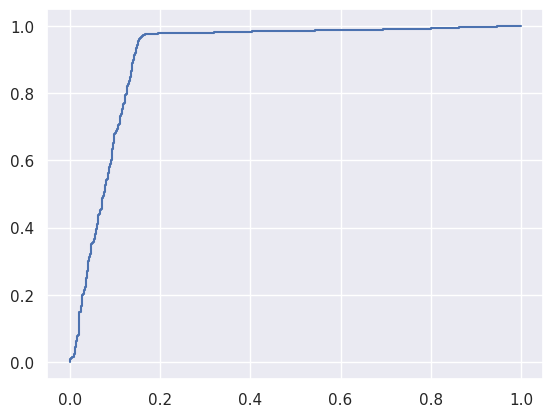

In [ ]:
pred_proba = xgbC.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_proba[:,1])
print(thresholds[:10])
plt.plot(fpr,tpr)

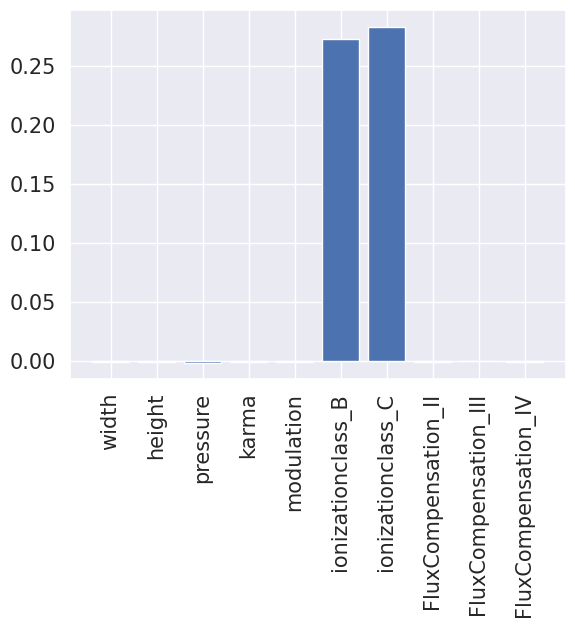

In [ ]:
from sklearn.inspection import permutation_importance
importance = permutation_importance(xgbC, X_test,
Y_test,n_repeats=10,random_state=42,scoring='neg_mean_absolute_error')
pos = np.arange(len(importance.importances_mean))
plt.bar(pos,importance.importances_mean,tick_label=X_test.columns)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeC = DecisionTreeClassifier(criterion='entropy')
treeC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
Y_test_pred_tree = treeC.predict(X_test)
acc=sum(Y_test_pred_tree==Y_test)/len(Y_test)
print(f"Test accuracy = {round(acc*100,2)} %")

Y_train_pred_tree = treeC.predict(X_train)
acc=sum(Y_train_pred_tree==Y_train)/len(Y_train)
print(f"Train accuracy = {round(acc*100,2)} %")

Test accuracy = 85.2 %
Train accuracy = 100.0 %


In [ ]:
confusion_matrix_tree = pd.crosstab(Y_test, Y_test_pred_tree, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_tree)

Predicted    0     1
Actual              
0          926   229
1          214  1625


In [ ]:
baseline = np.where((data['ionizationclass_B'] == 1) | (data['ionizationclass_C'] == 1), True, False)
confusion_matrix_baseline = pd.crosstab(data.error, baseline, rownames=['Actual'], colnames=['Predicted'])

acc=sum(baseline==data.error)/len(data)
print(f"Accuracy = {round(acc*100,2)} %")

print(confusion_matrix_baseline)

Accuracy = 91.92 %
Predicted  False  True 
Actual                 
0           3176    637
1            169   5998


In [ ]:
conf_mat = metrics.confusion_matrix(data.error, baseline)
print(conf_mat)
tn, fp, fn, tp = conf_mat.ravel()
tn, fp, fn, tp = (tn, fp, fn, tp)/tn
conf_mat = np.array([[tn,fp],[fn,tp]])
print(conf_mat)
P = sum((tn*0, fp*-10, fn*-150, tp*-10))
print(P)

[[3176  637]
 [ 169 5998]]
[[1.         0.20056675]
 [0.05321159 1.88853904]]
-28.8727959697733


In [ ]:
 no_err = 1-error_rate_total
 err = error_rate_total
 print((no_err, err))
 err /= no_err
 no_err = 1
 print((no_err, err))
 Stat_q = sum((no_err*0, err*-150))
 print(Stat_q)

(0.38206412825651304, 0.617935871743487)
(1, 1.6173616574875425)
-242.60424862313135
